# Biodiversity in National Parks

For this project, data from the National Parks Service will be analyzed to investigate whether there are any patterns or themes in the conservation statuses of different species. This project will be used to practice cleaning, analyzing and plotting data as well as posing and answering statistical questions in a meaningful way. Note that the data in this project is fictional. 

## Scoping

### Project Goals

The goal of this project is to understand characteristics about species and their conservation statuses, and if they have any relation to the national parks. Questions that will be answered: 
 What is the distribution of conservation statuses?
How often different species are conserved
Is there a significant difference of conservation status between species

### Data

There are two files of data used for this project. The first CSV had observations of species at national park locations, and the second has information about each species. 

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

#load data from csv files
observations=pd.read_csv('observations.csv')
species=pd.read_csv('species_info.csv')


## Previewing the Data

### Data Preview and Variable Types

To get an idea of the information in each data set, the first few rows of both are printed below. The data types are printed in order to get an idea of how each variable is stored. We can see that both data sets contain the column "scientific_name", which will be useful in tying observations conservation status. 



In [2]:
#preview data
print('Observations Preview')
observations.head()



Observations Preview


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
print('Species Preview')
species.head()

Species Preview


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:

print(observations.dtypes)
print(species.dtypes)


scientific_name    object
park_name          object
observations        int64
dtype: object
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


First, we will look at the details of the Conservation Status data. Below is a summary of the shape of the data set, the counts of unique scientific names, species, and conservation statuses as well as what the different species and conservation statuses are. Also below are the variable types for the data set. We can see that all of the variables in this data set are categorical. 

In [5]:
print("Shape of species data set: ", species.shape)
print("Number of unique scientific names: " , species.scientific_name.nunique())
print("Number of unique categories of species: ", species.category.nunique())
print("Species Categories: ", species.category.unique())
print("Number of Conservation Statuses: ", species.conservation_status.nunique())
print("Conservation Statuses: ", species.conservation_status.unique())

Shape of species data set:  (5824, 4)
Number of unique scientific names:  5541
Number of unique categories of species:  7
Species Categories:  ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Number of Conservation Statuses:  4
Conservation Statuses:  [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Now, we will look at the details of the Observations data set. We can see that there are 4 different parks, and the names of the parks. When we print out the number of observations by park, we can see that the observations are exactly evenly split between the four parks. By printing the variable types, we can see that the observation counts variable is numeric, and the other variables are categorical. 

In [6]:
print("Shape of Observations data set: ", observations.shape)
print("Count of Parks: ", observations.park_name.nunique())
print("Park Names: ", observations.park_name.unique())
print("Number of Observations by Park: ")
print(observations.groupby("park_name").scientific_name.count())

Shape of Observations data set:  (23296, 3)
Count of Parks:  4
Park Names:  ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Number of Observations by Park: 
park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
Name: scientific_name, dtype: int64


Now that we've looked at the data set, we know that the majority of our data is categorical. This means that we will have to focus on strategies to compare categorical variables, like box plots, contingency tables, and chi-squared statistics when analyzing the data. 

### Counts and nan Values

To get an idea of the distributions of two major variables, conservation status and animal category, the counts of each are tallied below. Its easiest to work with datasets if there are as few NaN values as possible. For this data set in particular, we can assume that if a species does not have a conservation status, it is not conserved. Therefore NaN values in the conservation_status columns can be replaced by 'Not Conserved'. 

To get an idea of the distributions of two major variables, conservation status and animal category, the counts of each are tallied below. We can see that the most common type of species is Vascular Plant, while the most common conservation status os Not Conserved. 

In [7]:
#conservation statuses
print(species.groupby('conservation_status').size())
print()
print(species.groupby('category').size())




conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


In [8]:
#fill in NaN information in species conservation status
species.conservation_status.fillna('Not Conserved', inplace=True)
print(species.groupby('conservation_status').size())

conservation_status
Endangered              16
In Recovery              4
Not Conserved         5633
Species of Concern     161
Threatened              10
dtype: int64


In [9]:
print("Conservation Statuses: ", species.conservation_status.unique())

Conservation Statuses:  ['Not Conserved' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


## Visualizing the Data

### Conservation Status

Now that we've previewed the data, looked at the counts, and cleaned the NaN values, we can start visualizing the data. These first two charts are visualizations of the counts above: the count in each animal category, and in each conservation status. In the Species chart, Vascular Plant is the largest category by far. In the Conservation chart, the same goes for the Not Conserved category. 

The charts of Conservation Status and Species each have one category that has a disproportionate number of animals, making it hard to see how the other categories compare. The secondary charts below show the same data, but without those categories (Vascular Plant and Not Conserved) to make it easier to see how the other categories compare to each other. With these new charts, we can see that counts in the other species are relatively close, with reptile being the smaller category. Conservation statuses still has a big gap between categories, with Species of Concern being the biggest category by far.

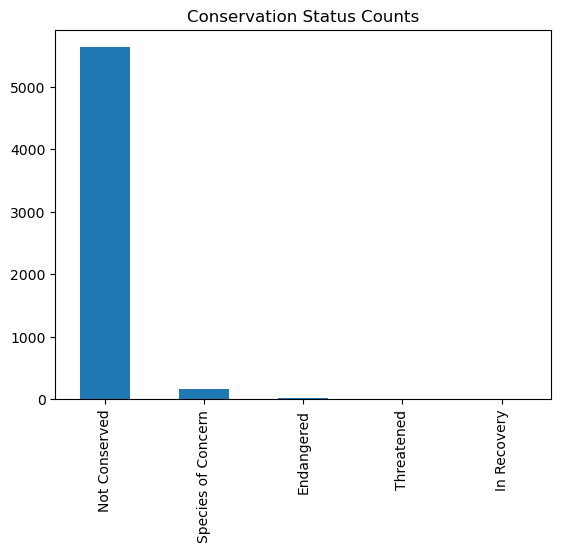

In [10]:
#plot animals of different levels of concern
#print(species['conservation_status'].value_counts())
species['conservation_status'].value_counts().plot(kind='bar')
plt.title("Conservation Status Counts")
plt.show()


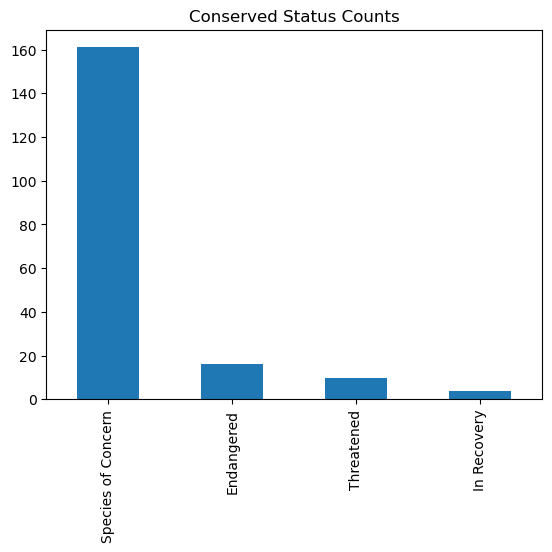

In [11]:
#plot animals of different levels of concern
#exclude not conserved animals
endangered_species=species[species.conservation_status != 'Not Conserved']
endangered_species['conservation_status'].value_counts().plot(kind='bar')
plt.title("Conserved Status Counts")
plt.show()

Text(0.5, 1.0, 'Species Category Counts')

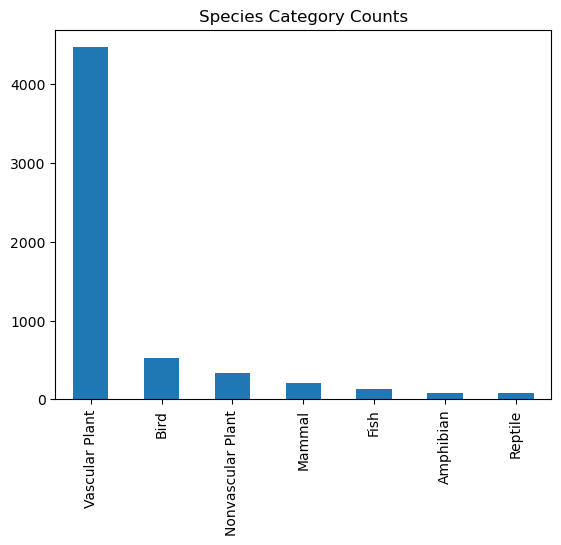

In [12]:
species['category'].value_counts().plot(kind='bar')
plt.title("Species Category Counts")

Text(0.5, 1.0, 'Species Cateory Counts')

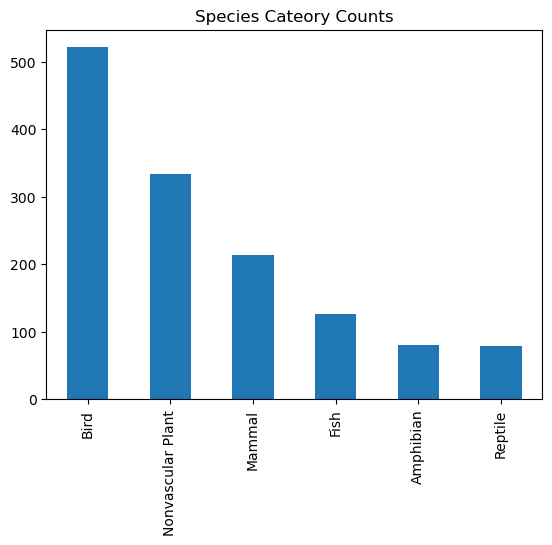

In [13]:
animal_species=species[species.category != 'Vascular Plant']
animal_species['category'].value_counts().plot(kind='bar')
plt.title("Species Cateory Counts")

Combining the two sets of information above, we can look at the conservation status by species type. The data below excludes the Not Conserved category.  Below is both a table and a stacked bar chart to better visualize the data. Now we can see what species make up the different conservation categories. Birds and vascular plants make up most of the Species of Concern category, while mammals make up most of the endangered category. 

In [14]:
#group by conservation status and species
conservation_category=endangered_species.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservation_category.head(8)


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 1.0, 'Conservation Status by Species Type')

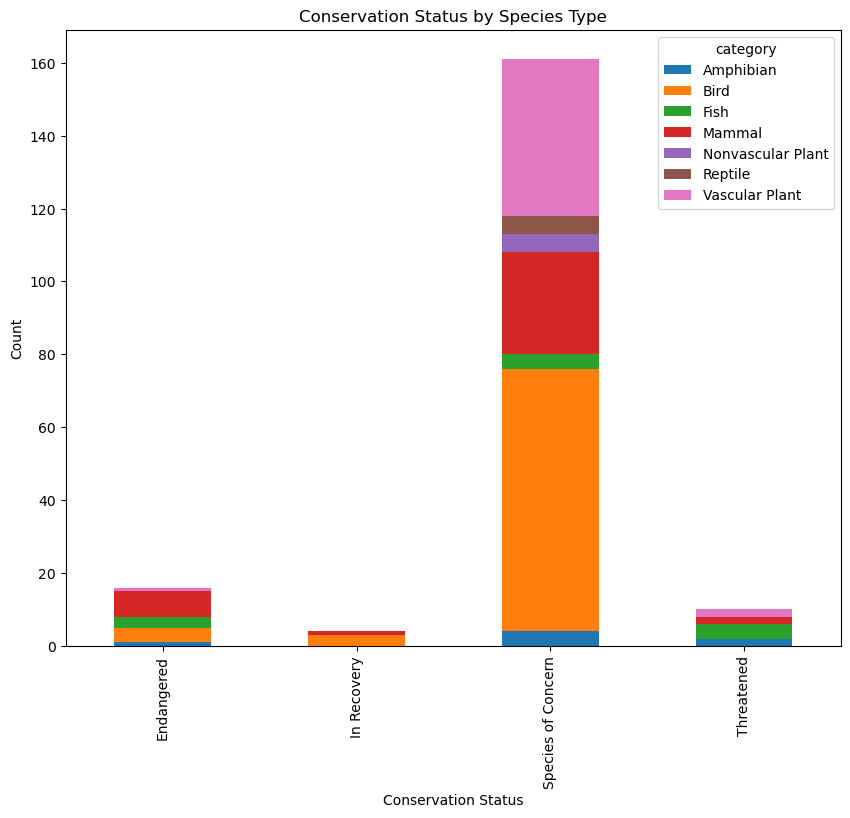

In [15]:
#plot stacked bar
ax=conservation_category.plot(kind='bar', figsize=(10, 8), stacked=True )
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Count')
ax.set_title('Conservation Status by Species Type')


### species in parks

Text(0.5, 1.0, 'Number of Animals Observed by Park')

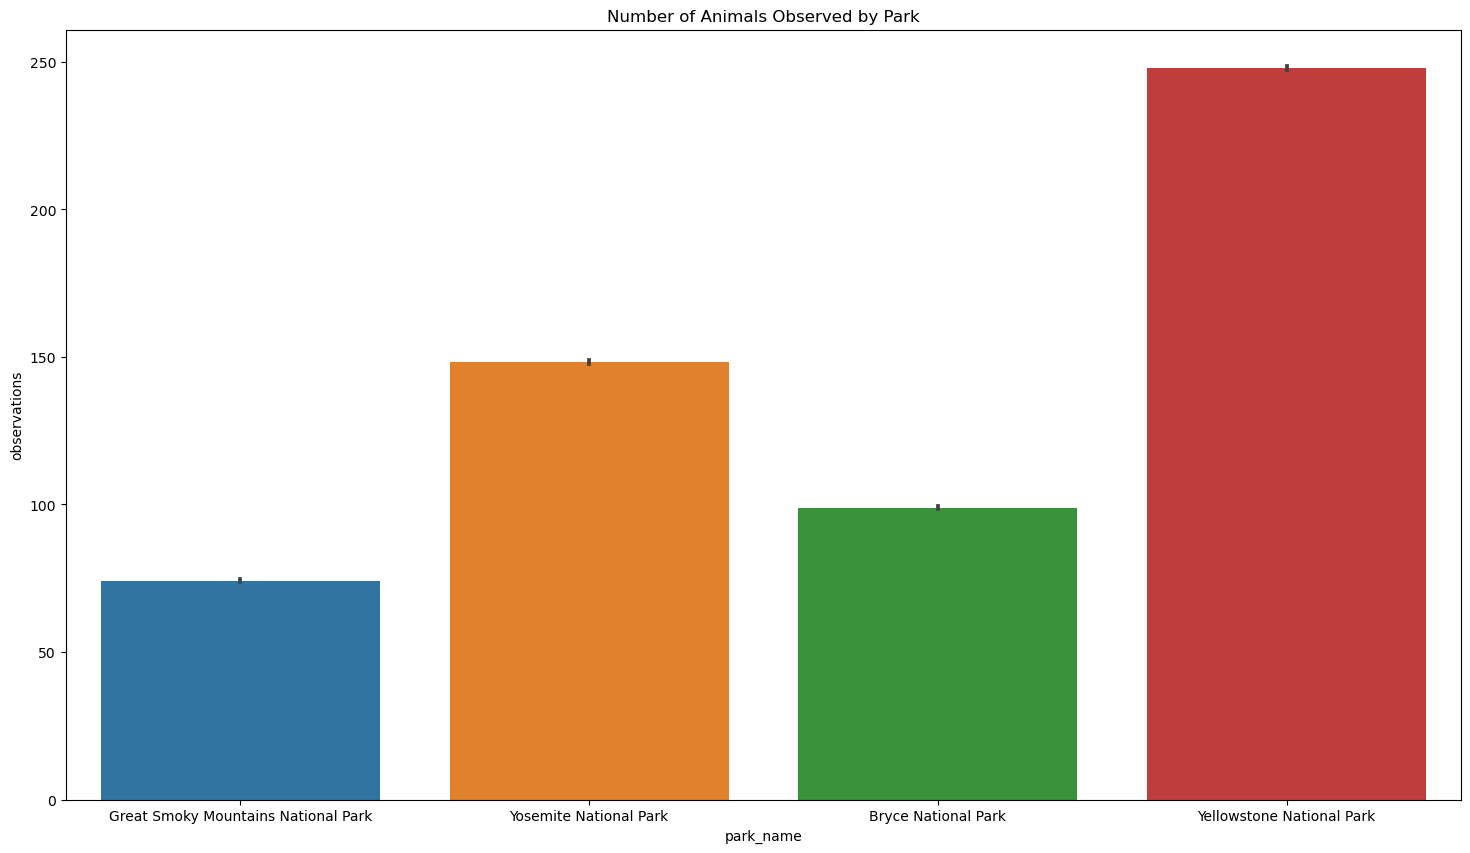

In [21]:
plt.figure(figsize=(18, 10))
sns.barplot(x=observations.park_name, y=observations.observations)
plt.title("Number of Animals Observed by Park")

try to find the number of protected observations byu park

In [22]:
combined=pd.merge(observations, species)
combined['is_protected']=combined.conservation_status != 'Not Conserved'
combined.head()


,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conserved,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conserved,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conserved,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conserved,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Conserved,False


Now let's look at visualizations of the Observations data set. From the Observations data, a new data set can be created that sums up the total number of animals from all observations in each park. From this we can see that Yellowstone saw the most animals. 

In [23]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
obs_by_park=combined.groupby(['park_name']).observations.sum().reset_index()
print(obs_by_park)

                             park_name  observations
0                  Bryce National Park        633291
1  Great Smoky Mountains National Park        474863
2            Yellowstone National Park       1587641
3               Yosemite National Park        949452


Text(0.5, 1.0, 'Observations by Park')

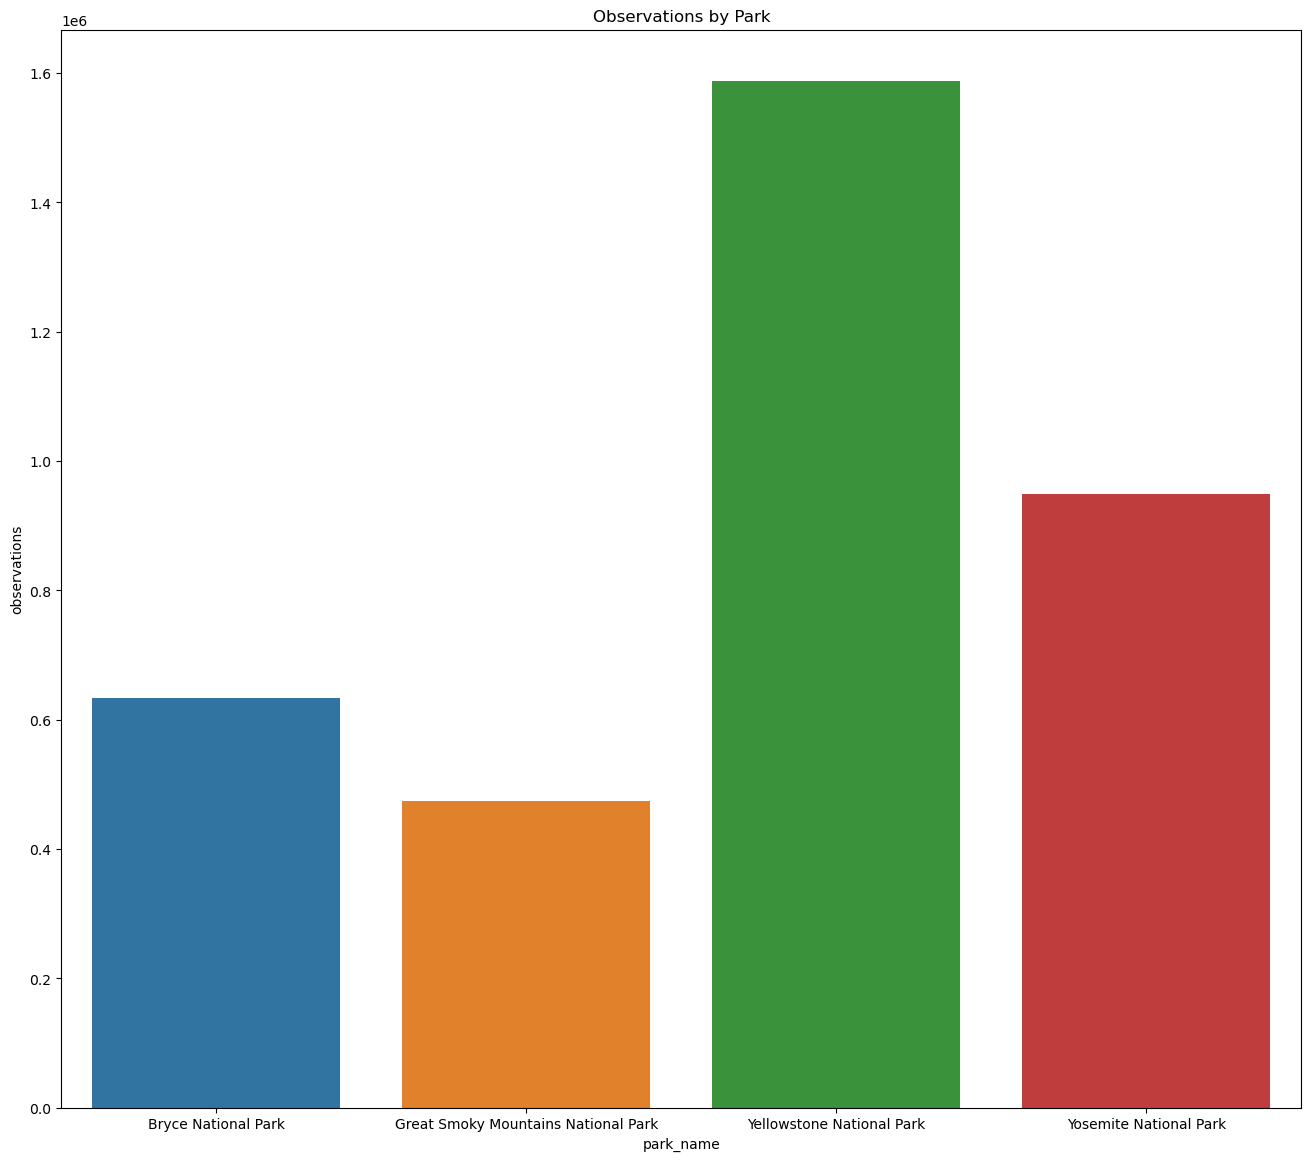

In [24]:
plt.figure(figsize=(16, 14))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations)
plt.title("Observations by Park")

In [25]:
category_counts = combined.groupby(['park_name', 'is_protected'])\
                        .observations.count()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='park_name',
                                      values='observations')\
                        .reset_index()
category_counts.columns = ['Park', 'not_protected', 'protected']
category_counts['percent_protected']=round(category_counts.protected/(category_counts.not_protected+category_counts.protected)*100, 1)
print(category_counts)

                                  Park  not_protected  protected  \
0                  Bryce National Park           6188        220   
1  Great Smoky Mountains National Park           6188        220   
2            Yellowstone National Park           6188        220   
3               Yosemite National Park           6188        220   

   percent_protected  
0                3.4  
1                3.4  
2                3.4  
3                3.4  


In [27]:
print(combined.head())

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  \
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch       Not Conserved   
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch       Not Conserved   
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch       Not Conserved   
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch       Not Conserved   
4          Mammal                       American Mink       Not Conserved   

   is_protected  
0         False  
1         False  
2         False  
3       

In [28]:
#combined.common_names.unique()
combined['name']=combined.apply(lambda row: row.common_names.split()[0], axis = 1)
combined.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,name
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conserved,False,Purple
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conserved,False,Purple
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conserved,False,Purple
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conserved,False,Purple
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Conserved,False,American


## Exploring Correlations

We can now answer some statistical questions we have about the data. To simplify this, we can group all of the conserved categories together to get an idea of the types of species that are protected vs not protected. This will help us get a better idea of whether one species is more likely to be protected than another. We can see that a high percent of mammals and birds are protected, while a low percent of vascular and non-vascular plants are protected. 

With this data we can compare different species with a chi-squared test and see whether there is a statistically significant difference in the likelihood of one species being protected vs another. We will use a significance threshold of 0.05, so if the p-value is below that we will consider it statistically significant. 

When we compare the two most protected species, mammals and birds, we get a p-value of 0.68. This is above 0.05, so we cannot conclude that one of those species is more likely to be protected than the other. 

Repeated with mammals vs all the other species, we find that mammals are statistically more likely to be protected than nonvascular plants, reptiles and vascular plants. They are not significantly more likely to be protected than amphibians, birds or fish (although the results for fish and birds would be different if we had chosen a slightly higher significance threshold).

In [17]:
#print(endangered_species.groupby(['category', 'conservation_status']).count().unstack())
\
#create new column 
species['is_protected']=species.conservation_status != 'Not Conserved'
#print(species.groupby(['category', 'is_protected']).count())
#print(species.head())


category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                              .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']
category_counts['percent_protected']=round(category_counts.protected/(category_counts.not_protected+category_counts.protected)*100, 1)
print(category_counts)



            category  not_protected  protected  percent_protected
0          Amphibian             72          7                8.9
1               Bird            413         75               15.4
2               Fish            115         11                8.7
3             Mammal            146         30               17.0
4  Nonvascular Plant            328          5                1.5
5            Reptile             73          5                6.4
6     Vascular Plant           4216         46                1.1


In [18]:
#exploring if certain species are more likely do be endangered using crosstab tables, 
#chi-squared statistics, and pvalues
#first looking at mammals vs birds
from scipy.stats import chi2_contingency
mammal_bird_crosstab=([146, 30], [413, 75])
chi2mb, pvalmb, dofmb, expectedmb=chi2_contingency(mammal_bird_crosstab)
print('Mammals vs Birds protection status')
print("Chi-Squared: ", chi2mb)
print("P-Value: ", pvalmb)
#pval is .68, not statistically significant

Mammals vs Birds protection status
Chi-Squared:  0.16170148316545574
P-Value:  0.6875948096661336


In [19]:
mammal_reptile_crosstab=([146, 30], [73, 5])
chi2mr, pvalmr, dofmr, expectedmr=chi2_contingency(mammal_reptile_crosstab)
print('Chi Squared, pvalue mammals vs reptile protection')
print(chi2mr, pvalmr)
#pval is.038, statistically significant

Chi Squared, pvalue mammals vs reptile protection
4.289183096203645 0.03835559022969898


In [20]:
mammal_amphibian_crosstab=([146, 30], [72, 7])
chi2ma, pvalma, dofma, expectedma=chi2_contingency(mammal_amphibian_crosstab)
print("Mammal vs Other Species P-Values: ")
print("Amphibian: ", pvalma, )
print("->non-significant")
mammal_bird_crosstab=([146, 30], [413, 75])
chi2mb, pvalmb, dofmb, expectedmb=chi2_contingency(mammal_bird_crosstab)
print("Bird: ", pvalmb)
print("->non-significant")
mammal_fish_crosstab=([146, 30], [115, 11])
chi2mf, pvalmf, dofmf, expectedmf=chi2_contingency(mammal_fish_crosstab)
print("Fish: ", pvalmf)
print("->non-significant")
mammal_nvplant_crosstab=([146, 30], [328, 5])
chi2mn, pvalmn, dofmn, expectedmn=chi2_contingency(mammal_nvplant_crosstab)
print("Nonvascular Plant: ", pvalmn)
print("->significant")
print("Repltile: ", pvalmr)
print("->significant")
mammal_vplant_crosstab=([146, 30], [4216, 46])
chi2mv, pvalmv, dofmv, expectedmv=chi2_contingency(mammal_vplant_crosstab)
print("Vascular Plant: ", pvalmv)
print("->significant")


Mammal vs Other Species P-Values: 
Amphibian:  0.12757669693198975
->non-significant
Bird:  0.6875948096661336
->non-significant
Fish:  0.0561483484489001
->non-significant
Nonvascular Plant:  1.481868915759314e-10
->significant
Repltile:  0.03835559022969898
->significant
Vascular Plant:  1.4405067309854046e-55
->significant


## Conclusion

Throughout the course of this project, many data visualizations and observations were made about the species in the four National Parks that this data contains. With statistical analysis, the project was able to answer the questions posed in the beginning: 

What is the distribution of conservation statuses?
  - most species are not conserved, and each tier of higher conservation status has fewer species in it

How often different species are conserved
  - Birds and Mammals are the most conserved species by percentage, while plants are the least

Is there a significant difference of conservation status between species
  - Mammals are significantly more conserved than a few of the other species

## Further Research

It would be interesting to do some further analysis on the size of the parks in relation to the number of animals seen in them, as well as the type of landscape that each park contains (i.e. forest, mountain, lake ...). 

A variable that we did not spend a lot of time considering is the common_name column in the Species data set. With string manipulation and analyzation, we could get a better idea of what types of animals are seen most frequently in which National Parks. 